# Executive Summary

# Data Import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/Users/louisbademosi/Desktop/Flatiron-DS/london-ds-111819/mod_1/project/kc_house_data.csv')

In [5]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

# Data Cleaning 

### Casual exploration to give me an overview of the data set

In [6]:
#We can see that we have about 21,600 houses in this data set 
df.shape

(21597, 21)

In [5]:
(df.waterfront == True).sum() #few houses have water fronts

146

In [6]:
df.columns     #the condition column is not included in the print of the df

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
print(df.condition.min())  #not specified in the documents but the condition rating is out of 5
print(df.condition.max())

1
5


In [8]:
print(sorted(df.price)[-5:]) #here I am checking the top 5 maximum house prices 
print(sorted(df.price)[:5]) #here I am checking the bottom 5 minimum house prices to get an idea of the range 

[5350000.0, 5570000.0, 6890000.0, 7060000.0, 7700000.0]
[78000.0, 80000.0, 81000.0, 82000.0, 82500.0]


In [9]:
'''
here we can see that the water front, view and yr_renovated columns have na values. These will be the most obvious
to clean but I have noticed some other null values that wouldnt come up in this search 
'''

test_df = df
test_df.isna().sum() 

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Thoughts so far

So far my light exploration hasn't returned many issues to be cleaned: <br>
1.Each column contains 1 variable only  <br>
2.Each row is has just one observation (as far as I havce been able to see)  <br>
3.The data frame itself contains the information for only one subject ie. the information of property   

In [10]:
'''
I aim to screen for any of the values that arent NaN but are useless values. To do this I will first convert 
'sqft_basement' into an integer and then check the distributions of the values each column has in an attempt to spot
any outliers
'''
df.dtypes   

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [11]:
'''
this column has 454 '?' values. My options to deal with this are to: 
1.fill the rows with mean or median values, possibly based on the groups these individual rows may belong to belong to
2.drop the rows - would rather not lose any data
3.drop the whole column - definitely not worth losing the other 20,000 values
'''
#I would love to find something in common with the rows that have '?' values and group them together. giving a more
#accurate median/mean value fill

len(df.loc[(df.sqft_basement == '?' ), ['sqft_basement']])

454

In [12]:
test_code = df['sqft_basement'].map(lambda x: 0 if x == '?' else int(float(x)))
test_code.isna().sum()
#double checking the code written to fill null values worked correctly

0

In [13]:
'''
most of the houses dont have basements (or have 0.0 as the value, but we're assuming this means no basement), 
I believe it is safe to assume that the houses with '?' won't have a basement either so I will be using the modal 
value to fill the cells with null values
'''
print(test_code.value_counts().head())
len(test_df.loc[test_df.sqft_basement == '?'])

0      13280
600      217
500      209
700      208
800      201
Name: sqft_basement, dtype: int64


454

In [14]:
''' 
just double checking that none of the houses have strange renovation years. can conclude that the only strange values 
are the null values
'''
any((test_df.yr_renovated > 0) & (test_df.yr_renovated < 1935)) #latest renovation is 1935

True

In [15]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [16]:
'''
Almost 21,000 of the 21,600 houses have not been renovated. About 4,000 of these are null values but I am confident
that these houses were also not renovated. This assumption is based on the modal value
This will be ommited from the following visualisations 
'''
print(test_df.loc[(test_df.yr_renovated == 0) | (test_df.yr_renovated.isna()), ['yr_renovated']].shape)
test_df.yr_renovated.isna().sum()

(20853, 1)


3842

In [17]:
test_df['yr_renovated'].unique()
#I would like a visualisation of these dates without the 0 and NaN values

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'\nTo conclude, I do not see any glaring issues in the spread of the data here. Only values that are note worthy are the\nnumber of houses that were not renovated (listed as 0) but this is to be expected. Otheriwse I will fill the ~4,000\nNaN values with 0 expecting that the odds are they were also not renovated \n'

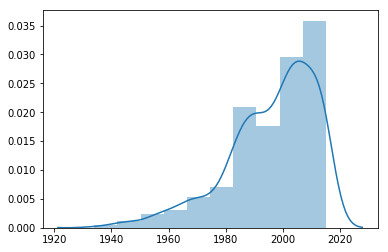

In [18]:
x = test_df.loc[(test_df.yr_renovated > 0) 
                 & (test_df.yr_renovated < 3000), 
                 ['yr_renovated']
                ]

sns.distplot(x, bins=10)
'''
To conclude, I do not see any glaring issues in the spread of the data here. Only values that are note worthy are the
number of houses that were not renovated (listed as 0) but this is to be expected. Otheriwse I will fill the ~4,000
NaN values with 0 expecting that the odds are they were also not renovated 
'''

In [19]:
'''
The house id column has 177 duplicated values. If each house has a unique id number then some of the houses in the 
data have been acounted for more than once. On top of this, the duplicated house id's do not have the same data as
their duplicates, so I will have to select the duplicate I will keep based on other factors isntead of just dropping
the duplicates haphazardly (such as most complet data)
'''

print(test_df['id'].duplicated().sum())
test_df.duplicated().sum()

177


0

In [20]:
'''
I will now investigate the values of the duplicated house id's and use my findings to make a decision on which of the
duplicates will be kept. It seems as if the duplicates have the same values in all the other columns also. I do not 
know why the code in the cell before only shows duplicated values in the id column but not the whole data frame.
The duplicates will just be dropped 
'''
#These are all the duplicated id numbers 

test_df['is_duplicate'] = test_df['id'].duplicated(keep=False)
duplicated_df = test_df.loc[(test_df['is_duplicate'] == True)]
duplicated_df.head()

id        date      price  bedrooms  bathrooms  sqft_living  \
93   6021501535   7/25/2014   430000.0         3       1.50         1580   
94   6021501535  12/23/2014   700000.0         3       1.50         1580   
313  4139480200   6/18/2014  1380000.0         4       3.25         4290   
314  4139480200   12/9/2014  1400000.0         4       3.25         4290   
324  7520000520    9/5/2014   232000.0         2       1.00         1240   

     sqft_lot  floors  waterfront  view      ...       sqft_above  \
93       5000     1.0         0.0   0.0      ...             1290   
94       5000     1.0         0.0   0.0      ...             1290   
313     12103     1.0         0.0   3.0      ...             2690   
314     12103     1.0         0.0   3.0      ...             2690   
324     12092     1.0         NaN   0.0      ...              960   

     sqft_basement  yr_built yr_renovated  zipcode      lat     long  \
93           290.0      1939          0.0    98117  47.6870 -122.386   
94           290.0      1939          0.0    98117  47.6870 -122.386   
313         1600.0      1997          0.0    98006  47.5503 -122.102   
314         1600.0      1997          0.0    98006  47.5503 -122.102   
324          280.0      1922       1984.0    98146  47.4957 -122.352   

     sqft_living15  sqft_lot15  is_duplicate  
93            1570        4500          True  
94            1570        4500          True  
313           3860       11244          True  
314           3860       11244          True  
324           1820        7460          True  

[5 rows x 22 columns]

### New clean Data Frame

1. replace '?' values from sqft_basement column with 0, and change the column into an int type
2. fill water_front column null values with 0
3. fill view column null values with 0
4. fill yr_renovated column null values with 0
5. drop duplicated rows

In [7]:
clean_df = df

In [8]:
#1 replace '?' values from sqft_basement column with 0, and change the column into an int type
clean_df['sqft_basement'] = clean_df['sqft_basement'].map(lambda x: 0 if x == '?' else int(float(x)))

In [9]:
#2 fill water_front column null values with 0
clean_df['waterfront'] = clean_df['waterfront'].isna().apply(lambda x: 0 if True else x)
print(clean_df.waterfront.isna().sum())

0


In [10]:
#3 fill view column null values with 0
clean_df['view'] = clean_df['view'].isna().apply(lambda x: 0 if True else x)
clean_df.view.isna().sum()

0

In [11]:
#4 fill view column null values with 0
clean_df['yr_renovated'] = clean_df['yr_renovated'].fillna(0.0)
clean_df.view.isna().sum()

0

In [12]:
#5 drop all duplicated values
clean_df.drop_duplicates(subset='id', keep='first', inplace=True)

# EDA

# Answer 3 Questions here

In [13]:
clean_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955           0.0    98178  47.5112 -122.257   
1            400      1951        1991.0    98125  47.7210 -122.319   
2              0      1933           0.0    98028  47.7379 -122.233   
3            910      1965           0.0    98136  47.5208 -122.393   
4              0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

### Ploting a correlation matrix to give an overview of the correlations between all variables

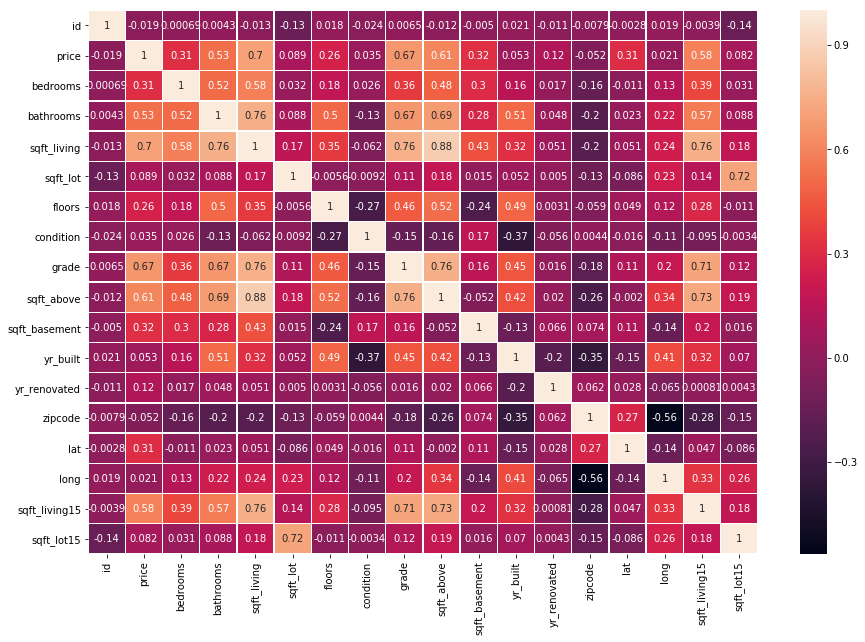

In [15]:
heat_df = clean_df.drop(['waterfront', 'view', 'id', 'date', 'long'], axis=1)
plt.figure(figsize=(15,10))
ax = sns.heatmap(heat_df.corr(), annot=True, linewidths=.5)

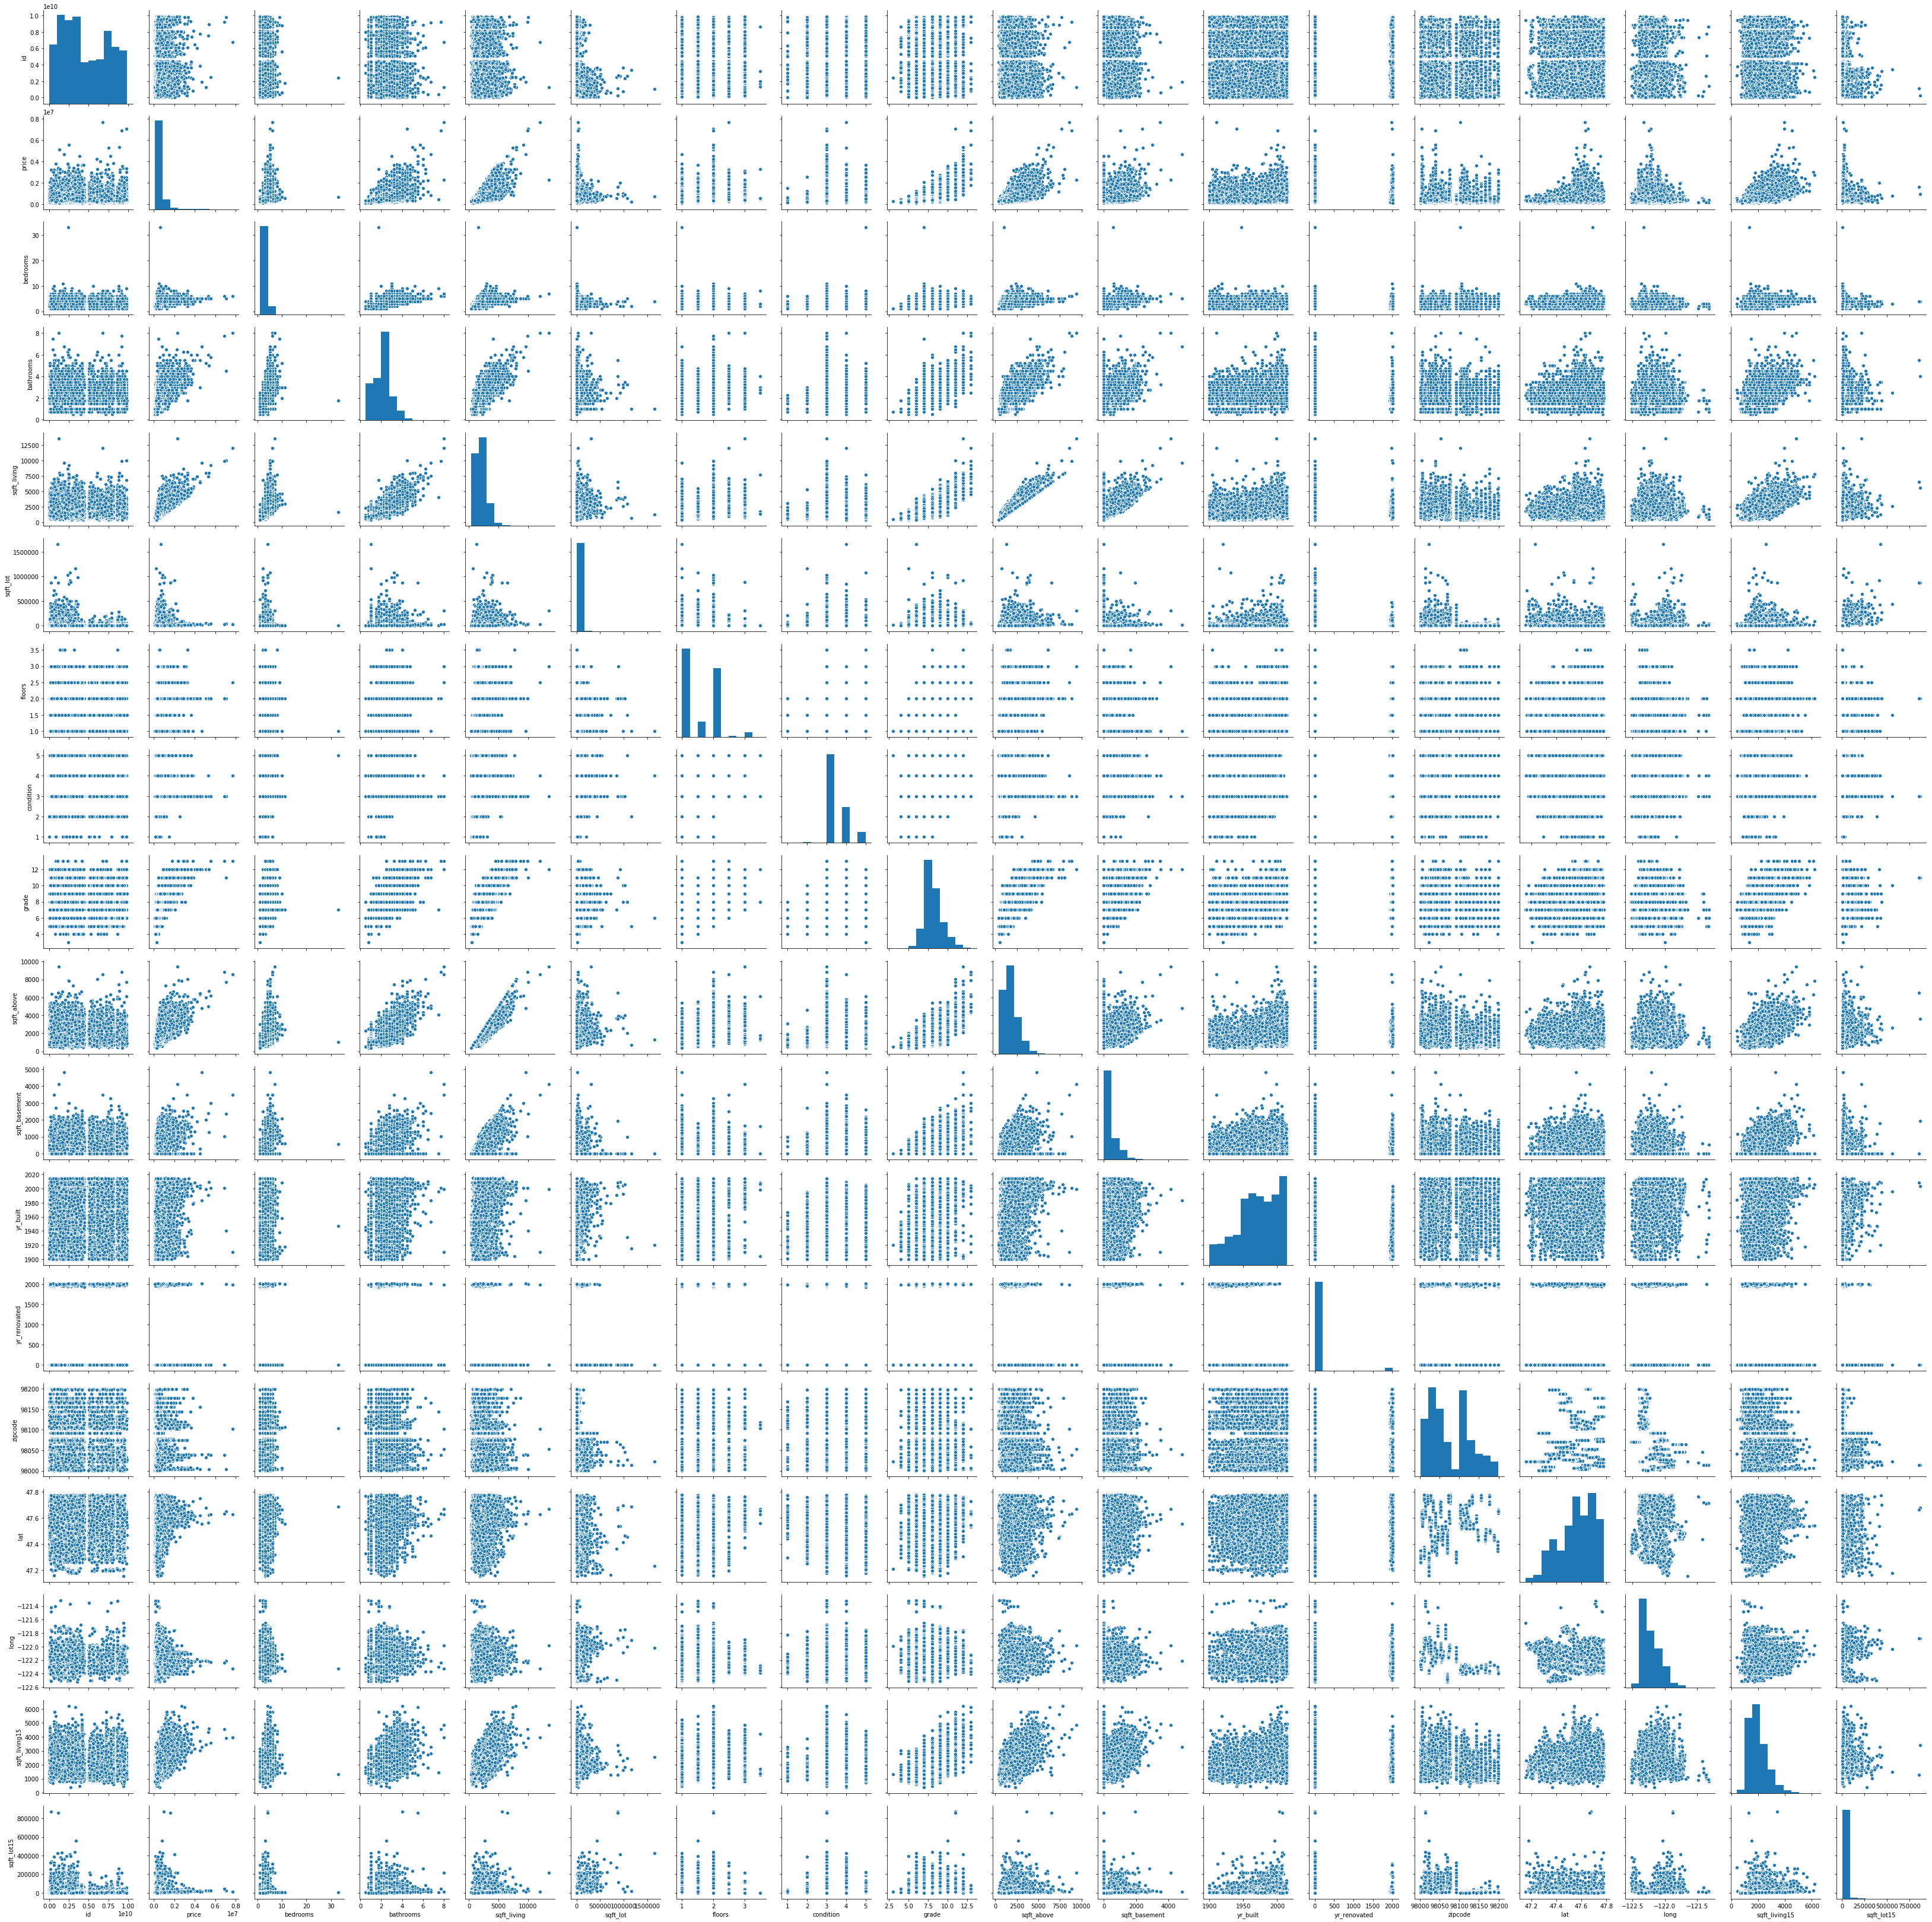

In [16]:
sns.pairplot(heat_df)

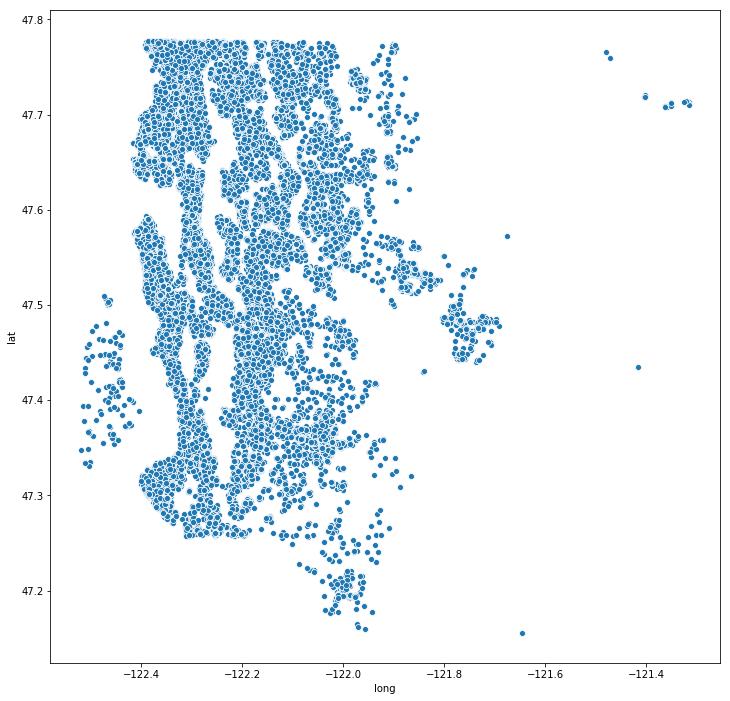

In [45]:
fig = plt.figure(figsize=(12,12))
sns.scatterplot(x=clean_df['long'], y=clean_df['lat'])

In [46]:
#creating a new column that catogorises the houses in groups of 4 based on their square ft livving values
for i,value in enumerate(clean_df['sqft_living']):
    if value >= 2500:
        clean_df.at[i, 'house_size'] = 4
        
    elif value >= 2000:
        clean_df.at[i, 'house_size'] = 3
        
    elif value >= 1000:
        clean_df.at[i, 'house_size'] = 2
        
    else:
        clean_df.at[i, 'house_size'] = 1

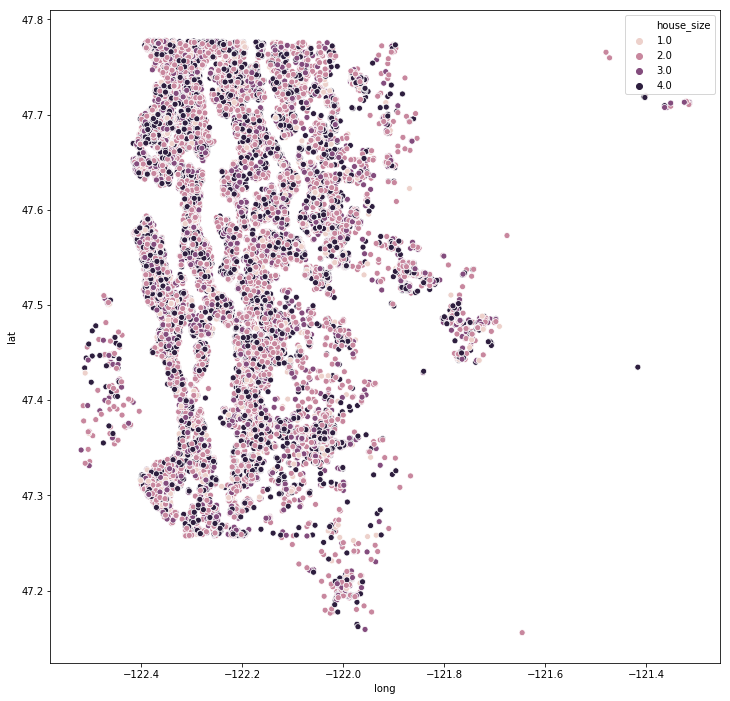

In [47]:
'''
I had hoped this plot could visualise some sort of comparison between house size 
and location but this is not the case
'''
fig = plt.figure(figsize=(12,12))
sns.scatterplot(x=clean_df['long'], y=clean_df['lat'], hue=clean_df['house_size'])

In [ ]:
'''
I will split the house prices into 4 bands and then plot the same scatter plot with the 4 catogories as the hue
This will hopefully create a visualisation of the areas with the most expensive prices
'''


In [ ]:
for i,value in enumerate(clean_df['price']):
    if value >= 750_000:
        clean_df.at[i, 'price_band'] = 4
        
    elif value >= 500_000:
        clean_df.at[i, 'price_band'] = 3
        
    elif value >= 250_000:
        clean_df.at[i, 'price_band'] = 2
        
    else:
        clean_df.at[i, 'price_band'] = 1

In [28]:
fig = plt.figure(figsize=(12,12))
sns.scatterplot(x=clean_df['long'], y=clean_df['lat'], hue=clean_df['price_band'])

KeyError: 'price_band'

<Figure size 864x864 with 0 Axes>

In [49]:
plt.figure(figsize=(15,15))
ax = sns.barplot(data=clean_df, x='price', y='zipcode')

ax.set_xlabel('Price')
ax.set_ylabel('Zip codes')

sns.despine(left=True, bottom=True)
sns.set_color_codes("pastel")

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


KeyboardInterrupt: 

<Figure size 1080x1080 with 0 Axes>

# Subsetting for Hypothesis

# Modeling 

In [ ]:
regression_df = df
de
model = smf.ols(formula=, data=regression_df,).fit()

# Conclusions